# Sonification of seismic waves

In this notebook you will learn about sonification: the process of changing the time scale of a signal to transpose it to the audible range. In this case, we will look at seismic waves and convert them into sound files.

*This notebook is adapted from Josh Russell's project found here: https://github.com/jbrussell/datamovies.*


Import numpy, matplotlib.pyplot, and librosa:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

We will also need a few more libraries:

In [2]:
import scipy as sp
from scipy import fftpack as spfft # for computing spectra
import resampy
from subprocess import call

## Opening the seismograph file
We will look at a seismograph from the magnitude 9 Tohoku earthquake (2011), recorded by a seimic station located in Central USA

Our seismic amplitude data is in the .BHZ file format. This means it is a broadband, high gain seismograph that is oriented on the Z axis (which measures the "up and down" motion of the earth).

We'll use the numpy .loadtxt() function to read in our file and assign it to the variable data:

In [3]:
data = np.loadtxt("9.1MAJO.BHZ") # This is the amplitude of the seismograph over time

Next we need to specify the sample rate (sr), which is measured in Herz (Hz):

In [4]:
sr = 20 # Datatype BHZ is sampled at 20 Hz

The duration is the total length of the file divided by the sample rate. Calculate duration below:

In [5]:
duration = len(data)/sr

Duration is measured in seconds. In the cell below, print out the duration of your seismograph:

In [6]:
print(duration)

25200.0


Now calculate the number of hours in the duration. Print out your result:

In [7]:
print(duration/60/60)

7.0


## Plotting the seismograph
Now that we know more about our seismograph, we can get ready to plot it.

First, we will need to convert our duration into time vectors using the np.arange() function:

In [8]:
t = np.arange(0,duration,1./sr) # time in seconds
t_hours = np.arange(0,duration/3600,1./sr/3600) # time in hours

Now we can plot the seismograph. Use t_hours for the x values and your uploaded amplitude data for the y values:

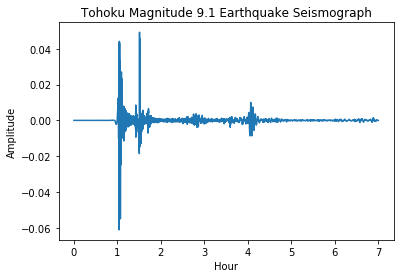

In [33]:
plt.plot(t_hours, data)
plt.xlabel("Hour")
plt.ylabel("Amplitude")
plt.title("Tohoku Magnitude 9.1 Earthquake Seismograph")
plt.show()

This is the way we're used to looking at seismographs. But what about the sound frequencies of this data? 

Most sounds are made up of a complicated mixture of vibrations. A **sound spectrum** is a representation of a sound in terms of the amount of vibration at each individual frequency. The power or pressure is measured in decibels and the frequency is measured in vibrations per second (Hz). 

Let's calculate the sound spectrum for our seismograph:

In [10]:
d = len(data)
f = np.arange(0,sr/2,sr/d) # calculate the frequency range
S = spfft.fft(data,d); S = S[:int(d/2)]
y = 20*np.log10(np.absolute(S)) # calculate the amplitude in decibels (dB)

The frequency is stored in a numpy array which can be indexed. Print out the first and the last frequency in the array: 

*Hint: you can use an index of -1 to wrap back around to the last item in an array*

In [11]:
print(f[0])
print(f[-1])

0.0
9.999960317460317


Now it's time to plot the sound spectrum. Use the frequency array for the x data and the y data as calculated above:

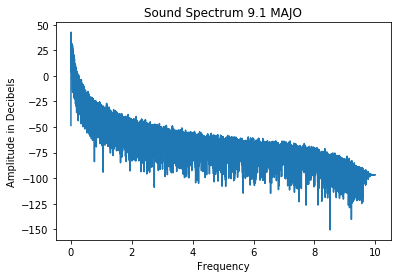

In [43]:
plt.plot(f, y)
plt.title("Sound Spectrum 9.1 MAJO")
plt.xlabel("Frequency")
plt.ylabel("Amplitude in Decibels")
plt.show()

### **So what does this mean?**

Watch this video of piano sound spectra: https://www.youtube.com/watch?v=5xjD6SRY8Pg

What do you notice?

## Hearing the seismograph
The human ear can only detect sounds between 0 and 140 decibels (sounds above 120 decibels are painful). What do you notice about the decibel range of the seismograph sound spectrum? Is this what you'd expect?

As you've probably noticed, we're going to have to scale this sound data so that it's detectable by the human ear.

First, we'll normalize the sound seismograph data so that it doesn't have any extreme spikes that could blow out our speakers:

In [13]:
data = data - np.mean(data) # force the signal's mean value to be zero
data_n = data/np.amax(np.absolute(data)) # normalized data that limits the signal's amplitude

Let's see what's changed about our data. Plot the normalized seismograph data, using t_hours for the x data and data_n for the y data:

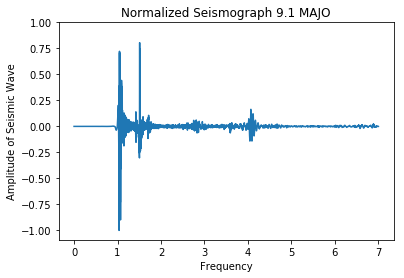

In [45]:
plt.plot(t_hours, data_n)
plt.title("Normalized Seismograph 9.1 MAJO")
plt.xlabel("Frequency")
plt.ylabel("Amplitude of Seismic Wave")
plt.ylim(top = 1)
plt.show()

Compare this graph to the similar one above. What has changed?

Let's look at our normalized sound spectrum. First we will recalculate the frequency and decibels with our new data:

In [15]:
f_log = np.log10(f)
S = spfft.fft(data_n,d); S = S[:int(d/2)]
y_norm = 20*np.log10(np.absolute(S))

# ignore the warning message that pops up when you run this cell

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Now plot the normalized sound spectrum using f_log for the x data and y_norm for the y data:

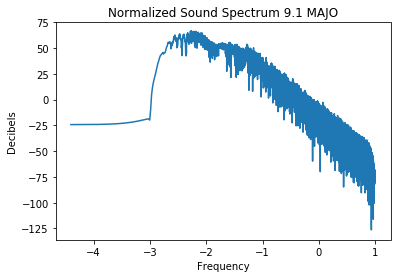

In [46]:
plt.plot(f_log, y_norm)
plt.title("Normalized Sound Spectrum 9.1 MAJO")
plt.xlabel("Frequency")
plt.ylabel("Decibels")
plt.ylim(top = 75)
plt.show()

What do you notice?

We're making progress! Now the sound is in the range of human hearing. But we're not done yet. Do you remember how long the sound file is? Print out the duration to double check:

In [17]:
print(duration)

25200.0


No one wants to sit and listen to a 14 hour sound! Let's convert our duration from over 50,000 seconds to 12 seconds:

In [18]:
targetDuration = 12.0 # Try playing with this number! What happens to the sound if you make it smaller? Larger?

How much do we need to speed up the duration? Calculate the speed factor below and assign it to the variable speedFactor:

In [19]:
speedFactor = duration/targetDuration

print out the speed factor:

In [20]:
print(speedFactor)

2100.0


We need to update the sampling rate to reflect our new speed:

In [21]:
sr_sound = int(sr*speedFactor)

We're finally ready to save this data as a sound file! Run the cell below to create the audible version of a seismograph:

In [31]:
librosa.output.write_wav("Tohoku_USA_9.1MAJO.wav", data_n, sr_sound, norm=False)